In [1]:
import pickle
import numpy as np
import pandas as pd
from math import floor, ceil

In [2]:
key_bins = ['125955', '123912', '269320', '272922', '98843', '129054', '260129', '8226', '288802'
            , '266280', '79921', '44083', '233011', '18485', '48195', '282195', '79956', '219770'
            , '219771', '219772', '265852', '40059', '88188', '175753', '78999', '24728', '129687'
            , '68766', '68767', '194208', '303774', '230563', '65193', '181434', '34495'
            , '305866', '99532', '88273', '139474', '305879', '46313', '2795', '133356', '274160'
            , '285943', '87799', '196354', '212738', '83720', '16141', '16143', '139538', '165661'
            , '250156', '48943', '152380', '240958', '106304', '200028', '31591', '96110', '258421'
            , '108413', '287619', '280981', '33689', '33697', '250791', '139178', '257965', '92082'
            , '123314', '247738', '34758', '11728', '25047', '253439']

kb = [int(item) for item in key_bins]
kb.sort()
key_bins = [str(item) for item in kb]
print(key_bins)

['2795', '8226', '11728', '16141', '16143', '18485', '24728', '25047', '31591', '33689', '33697', '34495', '34758', '40059', '44083', '46313', '48195', '48943', '65193', '68766', '68767', '78999', '79921', '79956', '83720', '87799', '88188', '88273', '92082', '96110', '98843', '99532', '106304', '108413', '123314', '123912', '125955', '129054', '129687', '133356', '139178', '139474', '139538', '152380', '165661', '175753', '181434', '194208', '196354', '200028', '212738', '219770', '219771', '219772', '230563', '233011', '240958', '247738', '250156', '250791', '253439', '257965', '258421', '260129', '265852', '266280', '269320', '272922', '274160', '280981', '282195', '285943', '287619', '288802', '303774', '305866', '305879']


In [3]:
genome = pickle.load(open('hg19.pickle', 'rb'))

In [4]:
chrom_names = [k for k in genome.keys()]
chrom_sizes = [len(genome[k]) for k in genome.keys()]
starting_indices = [sum(chrom_sizes[:idx]) for idx, item in enumerate(chrom_sizes)]
indices_by_chrom = {k:si for k, si in zip(genome.keys(), starting_indices)}
print(indices_by_chrom)

{'chr1': 0, 'chr2': 249250621, 'chr3': 492449994, 'chr4': 690472424, 'chr5': 881626700, 'chr6': 1062541960, 'chr7': 1233657027, 'chr8': 1392795690, 'chr9': 1539159712, 'chr10': 1680373143, 'chr11': 1815907890, 'chr12': 1950914406, 'chr13': 2084766301, 'chr14': 2199936179, 'chr15': 2307285719, 'chr16': 2409817111, 'chr17': 2500171864, 'chr18': 2581367074, 'chr19': 2659444322, 'chr20': 2718573305, 'chr21': 2781598825, 'chr22': 2829728720, 'chrX': 2881033286, 'chrY': 3036303846}


In [5]:
bin_size = 10000

def chr_pos_from_bin(bin_num):
    bin_start = bin_num * bin_size
    bin_end = bin_start + bin_size
    
    start_chrom_idx = -1
    end_chrom_idx = -1
    start_chrom_pos = -1
    end_chrom_pos = -1
    
    counter = bin_start
    
    ## TODO: figure out off by one, spend some time
    
    for idx, csize in enumerate(chrom_sizes):
        if counter - csize < 0:
            start_chrom_idx = idx
            start_chrom_pos = counter
            
            if counter - csize > -bin_size:
                end_chrom_idx = start_chrom_idx + 1
                end_chrom_pos = counter - csize + bin_size
            else:
                end_chrom_idx = start_chrom_idx
                end_chrom_pos = counter + bin_size
            break
        counter -= csize
        
    start_chrom = chrom_names[start_chrom_idx]
    end_chrom = chrom_names[end_chrom_idx]
        
    return ((start_chrom, start_chrom_pos), (end_chrom, end_chrom_pos))

In [6]:
def bin_from_chr_pos(ch, s, e):
    spos = indices_by_chrom[ch] + s
    epos = indices_by_chrom[ch] + e
    sbin = floor(spos / bin_size)
    ebin = floor(epos / bin_size)
    return (sbin, ebin)

In [7]:
for b in key_bins:
    (sc, scp), (ec, ecp) = chr_pos_from_bin(int(b))
    print(sc, scp, ec, ecp)
    if sc != ec:
        print('wow')

chr1 27950000 chr1 27960000
chr1 82260000 chr1 82270000
chr1 117280000 chr1 117290000
chr1 161410000 chr1 161420000
chr1 161430000 chr1 161440000
chr1 184850000 chr1 184860000
chr1 247280000 chr1 247290000
chr2 1219379 chr2 1229379
chr2 66659379 chr2 66669379
chr2 87639379 chr2 87649379
chr2 87719379 chr2 87729379
chr2 95699379 chr2 95709379
chr2 98329379 chr2 98339379
chr2 151339379 chr2 151349379
chr2 191579379 chr2 191589379
chr2 213879379 chr2 213889379
chr2 232699379 chr2 232709379
chr2 240179379 chr2 240189379
chr3 159480006 chr3 159490006
chr3 195210006 chr3 195220006
chr3 195220006 chr3 195230006
chr4 99517576 chr4 99527576
chr4 108737576 chr4 108747576
chr4 109087576 chr4 109097576
chr4 146727576 chr4 146737576
chr4 187517576 chr4 187527576
chr5 253300 chr5 263300
chr5 1103300 chr5 1113300
chr5 39193300 chr5 39203300
chr5 79473300 chr5 79483300
chr5 106803300 chr5 106813300
chr5 113693300 chr5 113703300
chr6 498040 chr6 508040
chr6 21588040 chr6 21598040
chr6 170598040 chr6 17

In [8]:
default_sequence = ['Z' for i in range(bin_size * 77)]

In [9]:
print(len(default_sequence))

770000


In [10]:
full_data = pd.read_csv('full-data.csv')
full_data.head()

,Unnamed: 0,car_chr,car_start,car_end,car_size,car_intlogqvalue,car_foldchange,car_pvalue,car_qvalue,car_summit_to_start,...,car_se_anno,car_methylation_anno,car_interaction_anno,car_commmon_snp_anno,Sample ID,Biosample type,Biosample name,Tissue type,Cancer type,Region number
0,0,chr1,9997,10802,805,1359,13.36316,138.88042,135.96225,204,...,0,0,1,5,Sample_0025,Primary Cell,CD56Bright natural killer cell,Blood,Normal,48025
1,1,chr1,20963,21340,377,108,5.73316,13.03911,10.84643,329,...,0,0,0,0,Sample_0025,Primary Cell,CD56Bright natural killer cell,Blood,Normal,48025
2,2,chr1,28785,29747,962,1636,18.39825,166.64635,163.63165,551,...,0,189,3,1,Sample_0025,Primary Cell,CD56Bright natural killer cell,Blood,Normal,48025
3,3,chr1,437449,437967,518,106,6.49730,12.88990,10.69930,515,...,0,0,0,0,Sample_0025,Primary Cell,CD56Bright natural killer cell,Blood,Normal,48025
4,4,chr1,540776,541301,525,263,9.65766,28.77254,26.39556,193,...,2,0,6,4,Sample_0025,Primary Cell,CD56Bright natural killer cell,Blood,Normal,48025


In [11]:
by_sample = {sample: default_sequence.copy() for sample in full_data['Sample ID'].unique().tolist()}

In [12]:
def write_key_bin(seq, bin_num, ch, s, e):
    data = genome[ch][s:e]
    left = indices_by_chrom[ch] + s
    right = indices_by_chrom[ch] + e
    
    from_left = left % bin_size
    from_right = right % bin_size
    
    a = floor(left / bin_size)
    b = floor(right / bin_size)
    
    if b > a:
        bn = key_bins.index(str(bin_num))
        x = bn*bin_size + from_left
        y = (bn+1)*bin_size
        seq[x: y] = data[:y-x]
        
    else:
        bn = key_bins.index(str(bin_num))
        x = bn*bin_size + from_left
        y = bn*bin_size + from_right
        seq[x: y] = data[:y-x]

In [15]:
for sample, seq in by_sample.items():
    print(sample, seq[:2])
    s_data = full_data[full_data['Sample ID'] == sample]
    for row in s_data.iterrows():
        ch = row[1]['car_chr']
        s = row[1]['car_start']
        e = row[1]['car_end']
        sbin, ebin = bin_from_chr_pos(ch, s, e)
        #print(ch, s, e, sbin, ebin)
        if str(sbin) in key_bins:
            #print('hi')
            write_key_bin(seq, sbin, ch, s, e)
        if str(ebin) in key_bins:
            #print('low')
            write_key_bin(seq, ebin, ch, s, e)
    print(collections.Counter(seq))
    by_sample[sample] = seq
        

Sample_0025 ['Z', 'Z']
Counter({'Z': 660206, 'C': 33223, 'G': 32586, 'A': 22713, 'T': 21272})
Sample_0026 ['Z', 'Z']
Counter({'Z': 616529, 'C': 44689, 'G': 44687, 'A': 33292, 'T': 30803})
Sample_0027 ['Z', 'Z']
Counter({'Z': 631717, 'C': 40103, 'G': 39992, 'A': 32194, 'T': 25994})
Sample_0028 ['Z', 'Z']
Counter({'Z': 616824, 'G': 43208, 'C': 42865, 'A': 36340, 'T': 30763})
Sample_0029 ['Z', 'Z']
Counter({'Z': 636858, 'C': 38942, 'G': 38292, 'A': 31095, 'T': 24813})
Sample_0030 ['Z', 'Z']
Counter({'Z': 648929, 'G': 35214, 'C': 35201, 'A': 28269, 'T': 22387})
Sample_0031 ['Z', 'Z']
Counter({'Z': 635850, 'G': 37561, 'C': 37471, 'A': 32465, 'T': 26653})
Sample_0032 ['Z', 'Z']
Counter({'Z': 642495, 'G': 38405, 'C': 37055, 'A': 28961, 'T': 23084})
Sample_0033 ['Z', 'Z']
Counter({'Z': 605023, 'G': 51158, 'C': 48212, 'A': 35064, 'T': 30543})
Sample_0034 ['Z', 'Z']
Counter({'Z': 609637, 'G': 50942, 'C': 49679, 'A': 30644, 'T': 29098})
Sample_0093 ['Z', 'Z']
Counter({'Z': 705094, 'G': 19126, 'C'

In [16]:
import collections
for k in by_sample.keys():
    print(collections.Counter(by_sample[k]))

Counter({'Z': 660206, 'C': 33223, 'G': 32586, 'A': 22713, 'T': 21272})
Counter({'Z': 616529, 'C': 44689, 'G': 44687, 'A': 33292, 'T': 30803})
Counter({'Z': 631717, 'C': 40103, 'G': 39992, 'A': 32194, 'T': 25994})
Counter({'Z': 616824, 'G': 43208, 'C': 42865, 'A': 36340, 'T': 30763})
Counter({'Z': 636858, 'C': 38942, 'G': 38292, 'A': 31095, 'T': 24813})
Counter({'Z': 648929, 'G': 35214, 'C': 35201, 'A': 28269, 'T': 22387})
Counter({'Z': 635850, 'G': 37561, 'C': 37471, 'A': 32465, 'T': 26653})
Counter({'Z': 642495, 'G': 38405, 'C': 37055, 'A': 28961, 'T': 23084})
Counter({'Z': 605023, 'G': 51158, 'C': 48212, 'A': 35064, 'T': 30543})
Counter({'Z': 609637, 'G': 50942, 'C': 49679, 'A': 30644, 'T': 29098})
Counter({'Z': 705094, 'G': 19126, 'C': 19104, 'A': 13943, 'T': 12733})
Counter({'Z': 715025, 'G': 16615, 'C': 15160, 'A': 11972, 'T': 11228})
Counter({'Z': 720921, 'G': 14609, 'C': 14086, 'A': 10624, 'T': 9760})
Counter({'Z': 710535, 'G': 17611, 'C': 17283, 'A': 12940, 'T': 11631})
Counter

In [17]:
persample = full_data[['Sample ID', 'Biosample type', 'Biosample name', 'Tissue type', 'Cancer type', 'Region number']]
persample = persample.drop_duplicates()
persample = persample.set_index('Sample ID')
persample.index.name = ''
display(persample)

,Biosample type,Biosample name,Tissue type,Cancer type,Region number
,,,,,
Sample_0025,Primary Cell,CD56Bright natural killer cell,Blood,Normal,48025
Sample_0026,Primary Cell,CD56Bright natural killer cell,Blood,Normal,50447
Sample_0027,Primary Cell,CD56Bright natural killer cell,Blood,Normal,47349
Sample_0028,Primary Cell,CD56Bright natural killer cell,Blood,Normal,46698
Sample_0029,Primary Cell,CD56Dim natural killer cell,Blood,Normal,40745
...,...,...,...,...,...
Sample_1467,Other,Macrophage,Blood,Other,10568
Sample_1468,Other,Monocyte,Blood,Other,6102
Sample_1469,Other,Monocyte,Blood,Other,8042


In [18]:
seqsdf = pd.DataFrame(by_sample).transpose()
seqsdf.head()

,0,1,2,3,4,5,6,7,8,9,...,769990,769991,769992,769993,769994,769995,769996,769997,769998,769999
Sample_0025,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
Sample_0026,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
Sample_0027,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
Sample_0028,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,C,A,C,T,T,C,A,A,G,A
Sample_0029,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z


In [19]:
bins_77 = pd.concat([persample, seqsdf], axis=1)

In [80]:
bins_77.to_csv('77bins.csv')

In [20]:
bins_77.head()

,Biosample type,Biosample name,Tissue type,Cancer type,Region number,0,1,2,3,4,...,769990,769991,769992,769993,769994,769995,769996,769997,769998,769999
Sample_0025,Primary Cell,CD56Bright natural killer cell,Blood,Normal,48025,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
Sample_0026,Primary Cell,CD56Bright natural killer cell,Blood,Normal,50447,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
Sample_0027,Primary Cell,CD56Bright natural killer cell,Blood,Normal,47349,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
Sample_0028,Primary Cell,CD56Bright natural killer cell,Blood,Normal,46698,Z,Z,Z,Z,Z,...,C,A,C,T,T,C,A,A,G,A
Sample_0029,Primary Cell,CD56Dim natural killer cell,Blood,Normal,40745,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z


In [21]:
cols = [i for i in range(770000)]
bins_77['seq'] = bins_77[cols].agg(''.join, axis=1)

In [25]:
collections.Counter(bins_77['seq'].loc['Sample_0025'])

Counter({'Z': 660206, 'C': 33223, 'T': 21272, 'G': 32586, 'A': 22713})

In [27]:
bins77_single_col = bins_77[['Biosample type', 'Biosample name', 'Tissue type', 'Cancer type', 'Region number', 'seq']]
bins77_single_col

,Biosample type,Biosample name,Tissue type,Cancer type,Region number,seq
Sample_0025,Primary Cell,CD56Bright natural killer cell,Blood,Normal,48025,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...
Sample_0026,Primary Cell,CD56Bright natural killer cell,Blood,Normal,50447,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...
Sample_0027,Primary Cell,CD56Bright natural killer cell,Blood,Normal,47349,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...
Sample_0028,Primary Cell,CD56Bright natural killer cell,Blood,Normal,46698,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...
Sample_0029,Primary Cell,CD56Dim natural killer cell,Blood,Normal,40745,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...
...,...,...,...,...,...,...
Sample_1467,Other,Macrophage,Blood,Other,10568,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...
Sample_1468,Other,Monocyte,Blood,Other,6102,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...
Sample_1469,Other,Monocyte,Blood,Other,8042,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...
Sample_1470,Other,Neutrophile,Blood,Other,7806,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...


In [28]:
bins77_single_col.to_csv('77bins.csv')

In [59]:
aaa = bins77_single_col[['Biosample name', 'Cancer type']].groupby('Cancer type').count().sort_values('Biosample name', ascending=False).transpose()
aaa = aaa.rename(index={'Biosample name': 'Count'})
aaa = aaa.rename_axis('Cell State', axis='columns')
aaa

Cell State,Normal,Leukemia,The Yellow fever,Other,Coronary artery disease,Cultured cancer,Hypogammaglobulinemia,HIV-1,Lymphoma,Melanoma,Myeloma
Count,289,60,31,29,17,12,5,4,2,2,1


In [50]:
asdf = ['a', 'a', 'a', 'a', 'a']
bb = ['b', 'b']
asdf[1:3] = bb
asdf

['a', 'b', 'b', 'a', 'a']

In [51]:
def write(seq):
    seq[1:3] = [1, 2]
    
hi = [0, 0, 0, 0, 0, 0]
write(hi)
print(hi)

[0, 1, 2, 0, 0, 0]


In [64]:
[b / 309568 for b in kb]

[0.009028710977878851,
 0.02657251395493074,
 0.03788505271862725,
 0.05214040210874509,
 0.05214686272482944,
 0.05971224415960306,
 0.07987905726690098,
 0.08090952553235477,
 0.10204866136034732,
 0.10882584763283026,
 0.10885169009716766,
 0.11142947591482323,
 0.11227904692991524,
 0.1294029098614844,
 0.1424016694231962,
 0.14960525635724622,
 0.1556846960926194,
 0.1581009665081662,
 0.21059347219350838,
 0.2221353628281993,
 0.22213859313624149,
 0.25519110502377507,
 0.25816944903866035,
 0.25828250982013645,
 0.2704413892908828,
 0.2836178157949142,
 0.2848744056233202,
 0.2851489818069051,
 0.2974532251395493,
 0.3104649059334298,
 0.3192933378126938,
 0.3215190200537523,
 0.34339466611536074,
 0.3502073857763076,
 0.3983422059127558,
 0.40027393012197643,
 0.40687344945213977,
 0.4168841740748398,
 0.4189289590655365,
 0.4307809592722762,
 0.4495878126938185,
 0.4505439838743023,
 0.4507507235890014,
 0.49223433946661155,
 0.5351360605747364,
 0.5677363293363655,
 0.5860877

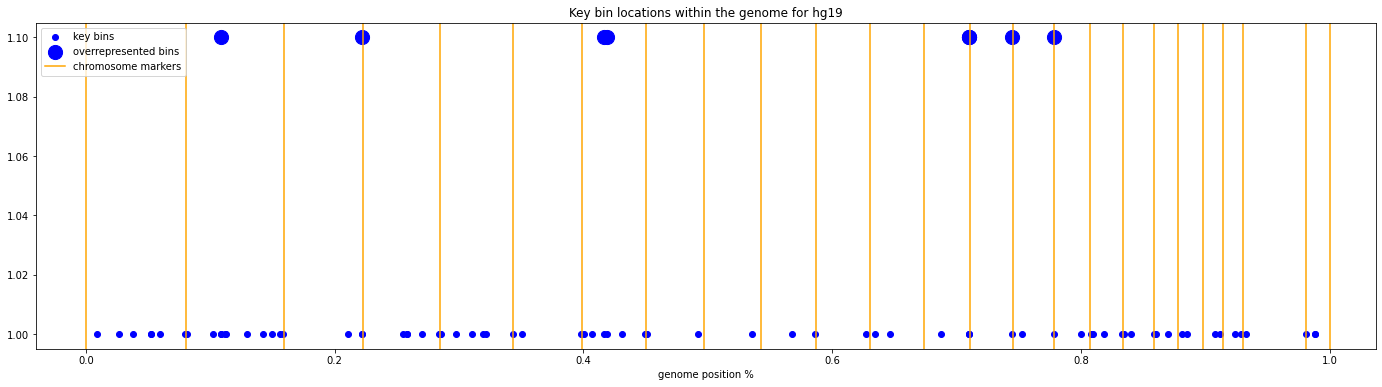

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
plt.scatter([b / 309568 for b in kb], [1 for b in kb], color='blue', label='key bins')
or_bins = [33697, 68767, 129054, 129687, 219770, 219771, 219772, 230563, 240958]
plt.scatter([b / 309568 for b in or_bins], [1.1 for b in or_bins], color='blue', s=200, marker='o', label='overrepresented bins')
#plt.scatter([i / 3095677412 for i in starting_indices], [.99 for i in starting_indices], marker='*', label='chromosome markers')
for idx, xval in enumerate([i / 3095677412 for i in starting_indices]):
    if idx == 0:
        plt.axvline(x=xval, color='orange', label='chromosome markers')
    else:
        plt.axvline(x=xval, color='orange')
plt.axvline(x=1, color='orange')
plt.xlabel('genome position %')
plt.title('Key bin locations within the genome for hg19')
#plt.ylim([.985, 1.005])
plt.legend()